**importing modules**

In [1]:
# data visualisation and manipulation
import pandas as pd #import the Pandas library to read the CSV and save it in a data frame
import matplotlib.pyplot as plt

#import nltk #preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize, sent_tokenize # tokenizing
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from nltk.corpus import stopwords  #stopwords
import emoji

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# (?) stop-words: this list includes 'not'
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olkos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olkos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olkos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [13]:
# loading dataset
reviews = pd.read_csv('../datasets/reviews_taxi_data - data.csv', encoding='utf-8')
reviews.head(5)

,order_id,feedback_id,rider_id,driver_id,created_at,stars,custom_comment
0,0d47c51b-a1df-4901-97eb-58ee193d9655,b89cf504-f2fb-4ad4-a113-1112f6da5265,9d9e0f25-a383-444e-afe7-01ed085d216f,d6c92134-8f65-4da4-b6ab-a2a5c4bbaf9f,2023-03-01 01:49:32,1,very not polite
1,ae23c8d2-496a-47a8-8fb4-bd48f3e6f342,93748ca6-e77a-46e9-8460-f9c65b3781f6,576e7518-c1af-4697-9182-4251a488cbec,a635ef51-6da4-446a-9161-45d0a48ec2d2,2023-03-01 03:40:14,3,not a pleasant interaction overall. The driver...
2,def53af0-8c66-4759-ac16-7143b9e116d5,7edf5cf5-aa9f-4be6-8ca7-cd03c1aa66c0,e24c35a0-1cbf-43a1-9cae-171a89d1e7c1,57c5de49-2a44-46f8-800c-71a39490ea92,2023-03-01 06:46:58,1,Driver is a theif. Our travel cost is 154 and ...
3,365c9450-344e-4608-8abb-a3e8b6ac7019,32e24028-cb9e-4499-bb48-142a0920b61b,b106a159-2d28-4019-bc7f-1feb31d0536e,254a79db-0421-4c3a-afae-3d93fd5fd5ac,2023-03-01 07:44:43,1,he was rude and did not drop me to my destination
4,52a81772-00cb-4ef0-8935-53ce4cd4c5e2,4372a23a-e506-4918-8006-71238e7eefa4,76311bc2-abbf-4c92-b07c-4716ad41c1ee,cee9eab5-9dc8-4565-b795-b4467059db7d,2023-03-01 07:55:51,1,Drove recklessly. Said he was a race driver. W...


#### **data cleaning & preprocessing:**

In [14]:
def clean_text(text):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(text)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stopwords and len(w)>2]
      cleaned_text=" ".join(tokens)
      return cleaned_text

In [15]:
reviews['clean_custom_comment'] = reviews['custom_comment'].apply(clean_text)
# print(reviews['clean_custom_comment'])
reviews.head(5)

,order_id,feedback_id,rider_id,driver_id,created_at,stars,custom_comment,clean_custom_comment
0,0d47c51b-a1df-4901-97eb-58ee193d9655,b89cf504-f2fb-4ad4-a113-1112f6da5265,9d9e0f25-a383-444e-afe7-01ed085d216f,d6c92134-8f65-4da4-b6ab-a2a5c4bbaf9f,2023-03-01 01:49:32,1,very not polite,very not polite
1,ae23c8d2-496a-47a8-8fb4-bd48f3e6f342,93748ca6-e77a-46e9-8460-f9c65b3781f6,576e7518-c1af-4697-9182-4251a488cbec,a635ef51-6da4-446a-9161-45d0a48ec2d2,2023-03-01 03:40:14,3,not a pleasant interaction overall. The driver...,not pleasant interaction overall The driver se...
2,def53af0-8c66-4759-ac16-7143b9e116d5,7edf5cf5-aa9f-4be6-8ca7-cd03c1aa66c0,e24c35a0-1cbf-43a1-9cae-171a89d1e7c1,57c5de49-2a44-46f8-800c-71a39490ea92,2023-03-01 06:46:58,1,Driver is a theif. Our travel cost is 154 and ...,Driver theif Our travel cost 154 gave 200. hur...
3,365c9450-344e-4608-8abb-a3e8b6ac7019,32e24028-cb9e-4499-bb48-142a0920b61b,b106a159-2d28-4019-bc7f-1feb31d0536e,254a79db-0421-4c3a-afae-3d93fd5fd5ac,2023-03-01 07:44:43,1,he was rude and did not drop me to my destination,rude did not drop destination
4,52a81772-00cb-4ef0-8935-53ce4cd4c5e2,4372a23a-e506-4918-8006-71238e7eefa4,76311bc2-abbf-4c92-b07c-4716ad41c1ee,cee9eab5-9dc8-4565-b795-b4467059db7d,2023-03-01 07:55:51,1,Drove recklessly. Said he was a race driver. W...,Drove recklessly Said race driver Was very rud...


In [16]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(reviews['clean_custom_comment'])

In [17]:
print(vect_text.shape)
print(vect_text)
# The lesser the value; more common is the word in the reviews.

(6357, 1000)
  (0, 654)	1.0
  (1, 895)	0.27502693905282355
  (1, 745)	0.2741226821386425
  (1, 770)	0.552449308173875
  (1, 282)	0.15348665957572155
  (1, 611)	0.5473915492784799
  (1, 648)	0.4699159892378108
  (2, 160)	0.27982854846798444
  (2, 98)	0.2779375105641002
  (2, 398)	0.2913976123019439
  (2, 261)	0.350331521028414
  (2, 14)	0.40555743950365625
  (2, 390)	0.3386254659754644
  (2, 228)	0.35337600166690153
  (2, 911)	0.4159815267145765
  (2, 282)	0.24442321603447842
  (3, 259)	0.591837768488482
  (3, 285)	0.6644840376698405
  (3, 745)	0.4562773492872068
  (4, 280)	0.27860853854759077
  (4, 53)	0.4488852298694052
  (4, 33)	0.3803208262187491
  (4, 54)	0.3331838588548007
  (4, 753)	0.2958352607351271
  (4, 706)	0.4488852298694052
  :	:
  (6356, 987)	0.19308040379366073
  (6356, 735)	0.17951841407989966
  (6356, 18)	0.2007181203174736
  (6356, 539)	0.1838331546637627
  (6356, 122)	0.3819106747528442
  (6356, 13)	0.1838331546637627
  (6356, 8)	0.19308040379366073
  (6356, 1)	0.167

#### **TOPIC MODELLING**

##### **LDA (LatentDirichletAllocation) with Sklearn**

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)
# n_components is the number of topics 

In [19]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(6357, 10)
[[0.05       0.05       0.05       ... 0.05       0.05000004 0.05      ]
 [0.49898711 0.0305664  0.03056243 ... 0.03056267 0.25648048 0.03060012]
 [0.02526977 0.02526901 0.44760355 ... 0.02527079 0.02526941 0.0252701 ]
 ...
 [0.12418559 0.02513926 0.02514037 ... 0.30020024 0.19048698 0.02515113]
 [0.20508002 0.04064948 0.11326533 ... 0.11993386 0.09619537 0.24723626]
 [0.18916244 0.04489865 0.22275702 ... 0.01748219 0.0470555  0.29413669]]


In [20]:
#We can now see the most frequent and rare words in the clean_custom_comment column based on idf score. 
#The lesser the value; more common is the word in the column.
print(vect.get_feature_names())

['00', '10', '100', '11', '12', '120', '13', '14', '15', '150', '17', '18', '19', '20', '200', '2017', '2018', '22', '25', '2nd', '30', '300', '35', '45', '50', '500', '99', 'able', 'absolutely', 'abusive', 'accept', 'accepted', 'access', 'accident', 'account', 'across', 'actual', 'actually', 'add', 'added', 'additional', 'address', 'adress', 'advance', 'advertising', 'advised', 'aggressive', 'ago', 'agreed', 'agressive', 'air', 'airport', 'allow', 'allowed', 'almost', 'alone', 'already', 'also', 'although', 'always', 'amazing', 'amount', 'angry', 'annoying', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'apartment', 'apologize', 'app', 'apparently', 'application', 'appointment', 'april', 'area', 'around', 'arrival', 'arrive', 'arrived', 'arriving', 'arrogant', 'ask', 'asked', 'asking', 'attempt', 'attempted', 'attention', 'attitude', 'automated', 'available', 'avoid', 'away', 'awesome', 'awful', 'baby', 'back', 'background', 'backseat', 'bad', 'badly', 'bag', 'balanc

c:\Users\olkos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
#  check the proportion of topics that have been assigned to the first document
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Doc 0: 
Topic  0 :  5.0000000034367105 %
Topic  1 :  5.000000004258735 %
Topic  2 :  5.000000002162652 %
Topic  3 :  5.000000059551395 %
Topic  4 :  5.000000003697678 %
Topic  5 :  54.99999615522282 %
Topic  6 :  5.000000004828979 %
Topic  7 :  5.000000003072965 %
Topic  8 :  5.000003762831163 %
Topic  9 :  5.0000000009369066 %


In [22]:
print(lda_model.components_.shape) # (no_of_topics*no_of_words)
print(lda_model.components_[0])  

(10, 1000)
[ 0.3114345   0.10687335  0.10692388  0.10715358  1.99103495  0.10704245
  0.17658739  0.10696757  0.1067206   0.10525619  0.13278853  0.73655138
  0.10820759  0.10657278  0.10621225  0.10742021  0.1309033   0.31171906
  1.85568789  0.10615812  0.10736791  0.10564854  0.10567701  2.8204536
  0.25904271  0.10660489  2.54899798 11.26719523  0.10626735  0.10733148
  0.14932452  0.10639901  5.54886209 16.69123806  0.10849321  0.10741788
  0.10590055  0.10651413  0.10670178  0.10639896  9.18046542  0.10870083
  0.10678198  0.10604013  0.10646734  0.11086136  0.15114819  0.10645708
  0.11101277  0.10792839  0.1059826   0.10644278  0.10742991  5.76707215
 27.06921765  0.10737739  0.10817956  6.82970179  0.10692339  0.10687508
  0.10561907  0.10628479  0.10779559  9.87523233  3.65392963  0.1071189
  0.10539604  0.10736947  0.10738811  0.10853311  0.10685178  0.10671386
  0.10780182  1.60539948  0.10761878  0.10623173  0.37386137  0.10687996
  0.10781261  0.1067873   0.10589939  0.11

In [23]:
# most important words for each topic in whole dataset
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
         print(t[0],end=" ")
     print("\n")

Topic 0: 
friendly like perfect fare problem care almost cancelled driver cab 

Topic 1: 
use day told number better walk let horrible top russian 

Topic 2: 
utaxi best driver change give person thank ride one thanks 

Topic 3: 
service advertising wrong address location say hour dropped helpful amazing 

Topic 4: 
fast driving going credit tried card professional utaxi drive dirty 

Topic 5: 
good great nice driver music car polite issue really company 

Topic 6: 
account always put one came cost two didnt tell come 

Topic 7: 
car route driver racist please passenger contact smell several help 

Topic 8: 
home find could point drop different long min rider driver 

Topic 9: 
utaxi rude driver time bad ride phone customer never charge 



In [24]:
# most important words for each topic in whole dataset in a view of table
vocab = vect.get_feature_names()
columns = []
words = []
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     sorted_words = dict(sorted_words)
     topic = "Topic "+str(i)
     columns.append(topic)
     words.append(sorted_words.keys())
     

In [25]:
topics_relevant_words = pd.DataFrame(words).transpose()
topics_relevant_words.columns = columns
topics_relevant_words.head(20)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,friendly,use,utaxi,service,fast,good,account,car,home,utaxi
1,like,day,best,advertising,driving,great,always,route,find,rude
2,perfect,told,driver,wrong,going,nice,put,driver,could,driver
3,fare,number,change,address,credit,driver,one,racist,point,time
4,problem,better,give,location,tried,music,came,please,drop,bad
5,care,walk,person,say,card,car,cost,passenger,different,ride
6,almost,let,thank,hour,professional,polite,two,contact,long,phone
7,cancelled,horrible,ride,dropped,utaxi,issue,didnt,smell,min,customer
8,driver,top,one,helpful,drive,really,tell,several,rider,never
9,cab,russian,thanks,amazing,dirty,company,come,help,driver,charge


In [26]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

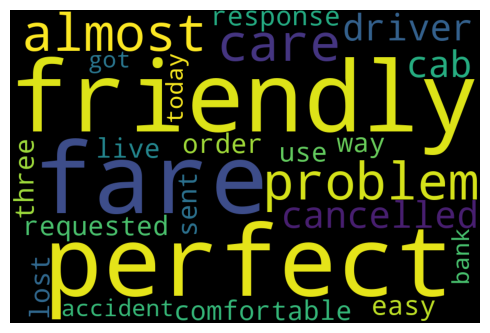

In [27]:
# topic 0
draw_word_cloud(0)

##### **LDA (LatentDirichletAllocation) with GenSim**

In [28]:
from gensim.utils import simple_preprocess

texts = reviews.clean_custom_comment.apply(simple_preprocess)

In [29]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [30]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [31]:
n_topics = 10

# Build an LSI(=Latent Semantic Indexing = LSA) model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [32]:
lsi_model.print_topics()

[(0,
  '0.628*"advertising" + 0.587*"other" + 0.510*"service" + 0.018*"great" + 0.014*"rude" + 0.012*"bad" + 0.010*"driver" + 0.010*"very" + 0.008*"good" + 0.007*"utaxi"'),
 (1,
  '-0.641*"rude" + -0.406*"very" + -0.294*"driver" + -0.187*"bad" + -0.167*"good" + -0.166*"nice" + -0.141*"the" + -0.133*"not" + -0.120*"car" + -0.090*"trip"'),
 (2,
  '0.727*"rude" + -0.248*"good" + -0.235*"nice" + -0.182*"very" + -0.176*"great" + -0.147*"car" + -0.145*"bad" + -0.140*"not" + -0.120*"best" + -0.119*"trip"'),
 (3,
  '0.449*"very" + 0.294*"nice" + 0.278*"bad" + -0.263*"wrong" + 0.215*"good" + -0.175*"not" + -0.172*"address" + -0.171*"location" + -0.158*"best" + -0.150*"utaxi"'),
 (4,
  '-0.525*"great" + 0.473*"bad" + -0.414*"best" + 0.198*"very" + 0.184*"wrong" + -0.176*"nice" + -0.148*"good" + 0.125*"behavior" + -0.125*"the" + 0.115*"address"'),
 (5,
  '0.763*"best" + -0.500*"great" + 0.238*"the" + 0.187*"bad" + -0.111*"wrong" + -0.072*"good" + -0.068*"thanks" + -0.063*"address" + -0.061*"locat

In [33]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.627794,advertising,0
1,0.586753,other,0
2,0.509888,service,0
3,0.018055,great,0
4,0.013942,rude,0


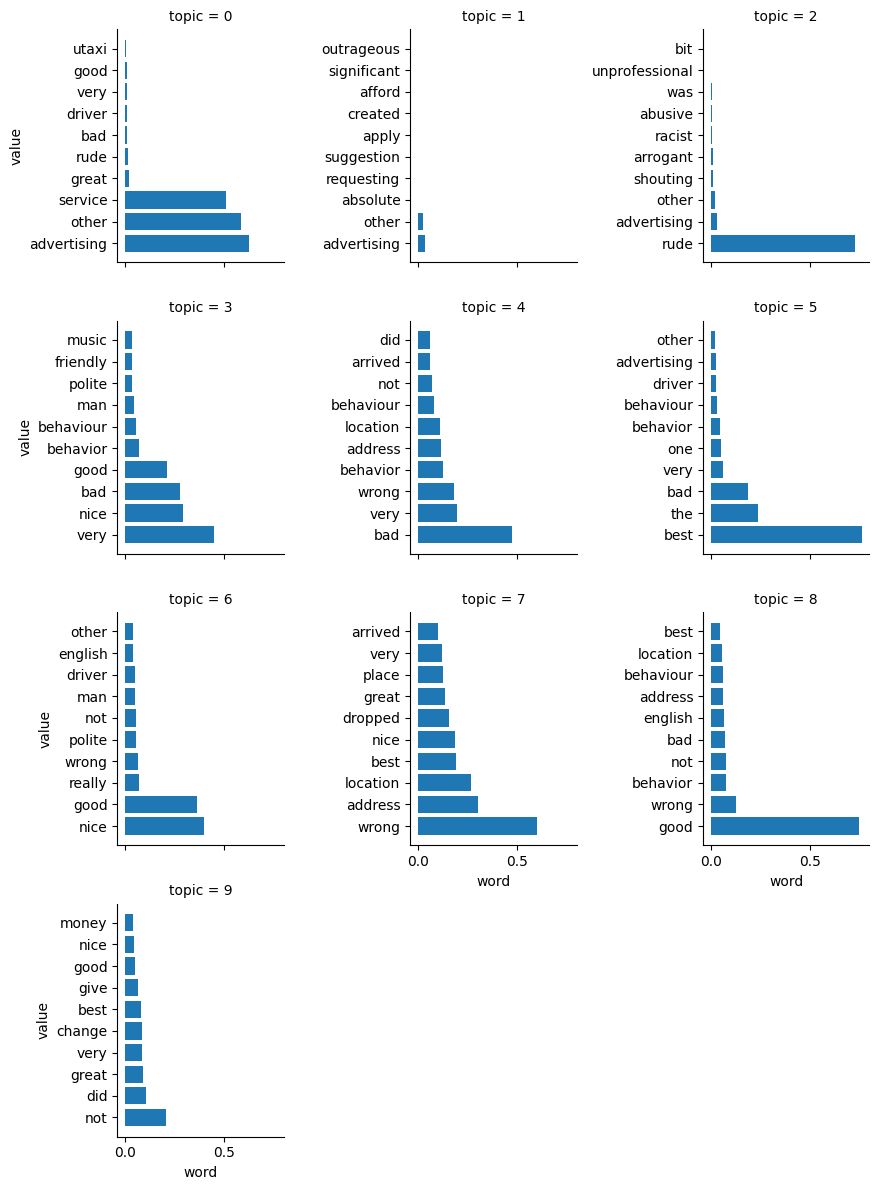

In [34]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [35]:
n_topics = 10

# Build an LDA model
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=n_topics)

In [36]:
lda_model.print_topics()

[(0,
  '0.015*"not" + 0.014*"every" + 0.013*"time" + 0.013*"called" + 0.013*"did" + 0.010*"someone" + 0.010*"pick" + 0.010*"getting" + 0.010*"driving" + 0.010*"several"'),
 (1,
  '0.039*"rude" + 0.021*"last" + 0.017*"mile" + 0.017*"driver" + 0.014*"very" + 0.010*"the" + 0.010*"that" + 0.009*"down" + 0.009*"man" + 0.009*"them"'),
 (2,
  '0.022*"rider" + 0.020*"wrong" + 0.014*"location" + 0.013*"car" + 0.012*"dropped" + 0.011*"done" + 0.011*"off" + 0.011*"away" + 0.010*"driver" + 0.010*"address"'),
 (3,
  '0.039*"utaxi" + 0.034*"airport" + 0.019*"area" + 0.018*"response" + 0.016*"next" + 0.015*"rate" + 0.012*"service" + 0.011*"may" + 0.010*"quick" + 0.010*"again"'),
 (4,
  '0.040*"utaxi" + 0.025*"them" + 0.020*"account" + 0.016*"same" + 0.015*"charge" + 0.013*"app" + 0.012*"could" + 0.012*"fee" + 0.012*"then" + 0.012*"charged"'),
 (5,
  '0.032*"utaxi" + 0.017*"card" + 0.016*"they" + 0.014*"not" + 0.013*"credit" + 0.011*"good" + 0.011*"very" + 0.010*"driver" + 0.010*"contact" + 0.009*"got

In [37]:
n_words = 10
topic_words = pd.DataFrame({})

for i, topic in enumerate(lda_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.015288,not,0
1,0.014107,every,0
2,0.013311,time,0
3,0.013308,called,0
4,0.012642,did,0


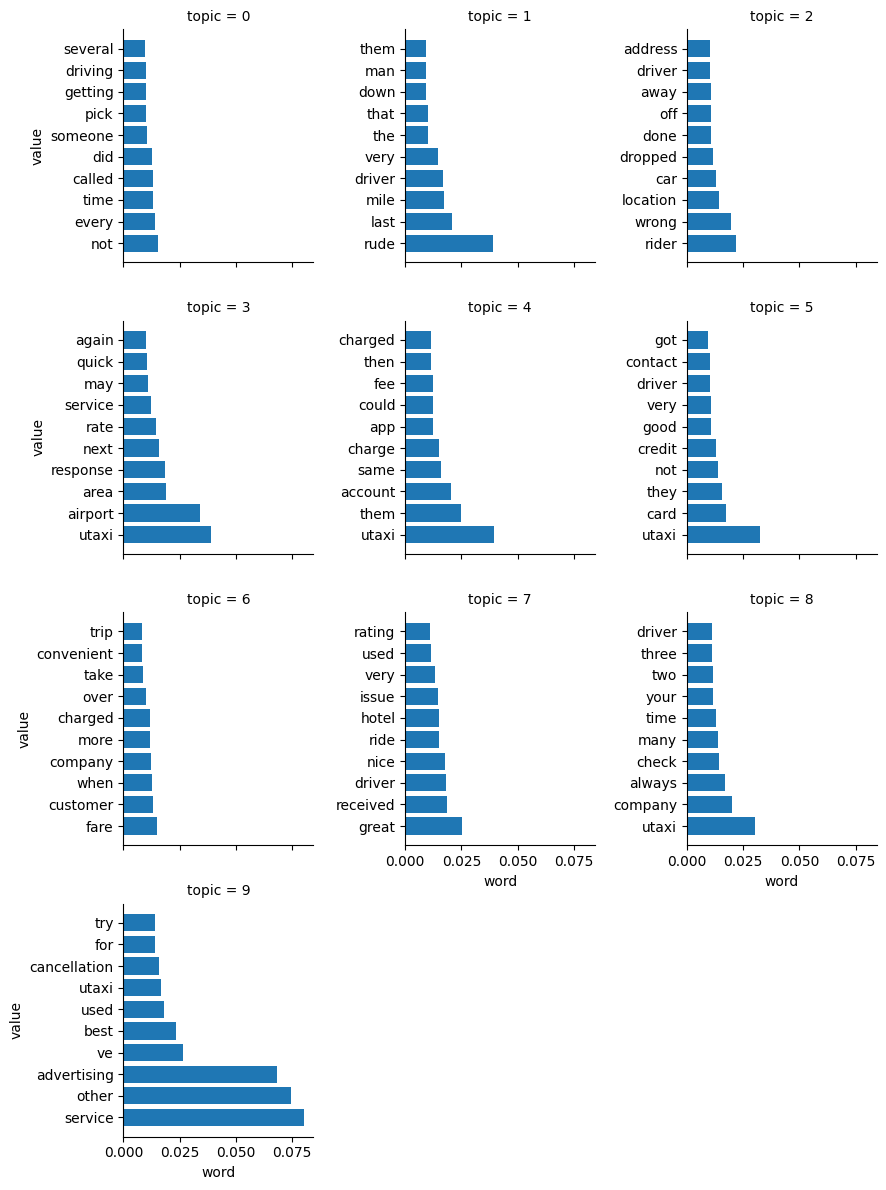

In [38]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

##### **BERTopic**

*BERTopic is a powerful tool for tasks such as document clustering, topic extraction based on the BERT (Bidirectional Encoder Representations from Transformers) algorithm.*

In [ ]:
!pip install bertopic

In [39]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans

c:\Users\olkos\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\olkos\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\olkos\AppData\Local\Programs\Python\Python3

In [40]:
corpus = reviews["clean_custom_comment"].to_list()

In [41]:
try:
  topic_model = BERTopic()
  topics, probs = topic_model.fit_transform(corpus)
except Exception as e:
  print(e)

In [42]:
# umap_model = UMAP(n_neighbors=15, n_components=10, min_dist=0.0, metric='cosine')

cluster_model = KMeans(n_clusters=15)

topic_model = BERTopic(hdbscan_model=cluster_model)
topics, probs = topic_model.fit_transform(corpus)

In [41]:
# To see how many topics were extracted, and how many tokens are associated to each of these topics

topic_model.get_topic_info()

# [Topic] -1 refers to all outliers and should typically be ignored"

,Topic,Count,Name,Representation,Representative_Docs
0,0,988,0_driver_idle_address_arrived,"[driver, idle, address, arrived, didn, started...","[idle started before taxi arrived, arrived lat..."
1,1,853,1_driver_car_very_nice,"[driver, car, very, nice, good, great, trip, t...","[amazing very nice car very nice trip, Very ni..."
2,2,717,2_driver_rude_driving_very,"[driver, rude, driving, very, bad, the, fast, ...","[Driver very rude, Driver very rude, The drive..."
3,3,702,3_utaxi_not_nt_time,"[utaxi, not, nt, time, ride, driver, customer,...",[asked picked Utaxi 2/13/18 really cold out da...
4,4,530,4_rude_bad_very_behavior,"[rude, bad, very, behavior, behaviour, racist,...","[very rude, Very rude, very rude]"
5,5,497,5_wrong_location_address_drop,"[wrong, location, address, drop, dropped, plac...","[Arrived wrong address, arrived wrong location..."
6,6,473,6_money_change_uah_give,"[money, change, uah, give, more, extra, driver...","[Very rude driver didn want give money back, d..."
7,7,467,7_phone_car_driving_mask,"[phone, car, driving, mask, while, driver, col...","[using phone while driving, Very bad driving u..."
8,8,377,8_english_very_good_nice,"[english, very, good, nice, great, guy, man, f...","[good car driver speaks very good English, dri..."
9,9,375,9_advertising_other_service_serviceshe,"[advertising, other, service, serviceshe, serv...","[Advertising other service, Advertising other ..."


In [43]:
def showTopics():
  for topics in range(0, (len(topic_model.get_topic_info()))):
    print(f"\nTopic: {topics + 1}\n")
    for t in topic_model.get_topic(topics):
      print("\t", t[0])

showTopics()


Topic: 1

	 driver
	 idle
	 didn
	 address
	 arrived
	 started
	 late
	 wrong
	 location
	 route

Topic: 2

	 driver
	 car
	 very
	 nice
	 good
	 great
	 smell
	 trip
	 polite
	 the

Topic: 3

	 utaxi
	 not
	 nt
	 time
	 ride
	 driver
	 customer
	 use
	 app
	 them

Topic: 4

	 rude
	 very
	 bad
	 behavior
	 behaviour
	 racist
	 shouting
	 not
	 slow
	 was

Topic: 5

	 money
	 change
	 give
	 uah
	 more
	 driver
	 extra
	 didn
	 took
	 pay

Topic: 6

	 wrong
	 location
	 address
	 drop
	 dropped
	 place
	 arrived
	 late
	 did
	 didn

Topic: 7

	 driving
	 mask
	 fast
	 too
	 driver
	 drive
	 cold
	 car
	 rule
	 very

Topic: 8

	 rude
	 driver
	 very
	 racist
	 the
	 bad
	 not
	 him
	 attitude
	 car

Topic: 9

	 advertising
	 other
	 service
	 serviceshe
	 servicesvery
	 servicesbad
	 servicesdidn
	 serviceswas
	 servicesso
	 servicesnot

Topic: 10

	 great
	 nice
	 very
	 guy
	 good
	 thanks
	 man
	 service
	 thank
	 recommend

Topic: 11

	 music
	 english
	 good
	 russian
	 loud
	 spe

In [44]:
topic_model.visualize_barchart()